# Question 1

Step 1. Import the necessary libraries

In [63]:
import numpy as np   
import pandas as pd


Step 2. Import the dataset from this address.
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

Step 3. Assign it to a variable called users

In [64]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter = '|')

#get 5 rows to confirm the data is loaded from the url
users.head(n=5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation

In [67]:
result = (users.groupby('occupation').age.agg(['mean']))
result

,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [37]:
occupationAndGender = users[['occupation','gender']]

maleData = occupationAndGender.loc[occupationAndGender['gender'] == 'M']
maleCoutByOccupation = maleData.groupby('occupation').count()

genderCountByOccupation = occupationAndGender.groupby('occupation').count()

maleRatio = maleCoutByOccupation / genderCountByOccupation

#getting ration in descending order
maleRatio.sort_values(by = 'gender', ascending = False)

,gender
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091
executive,0.906250
scientist,0.903226
entertainment,0.888889
lawyer,0.833333


Step 6. For each occupation, calculate the minimum and maximum ages

In [68]:
resultMinMax = (users.groupby('occupation').age.agg(['min', 'max']))
resultMinMax

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each occupation present the percentage of women and men

In [39]:
meanAge = users.groupby(['occupation','gender']).agg({'age':'mean'})
print("Mean Age by Occupation and Gender")
print(meanAge)

Mean Age by Occupation and Gender
                            age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
      

Step 8. For each occupation present the percentage of women and men

In [69]:
percentageOfMenWomen = ((users.groupby(['occupation', 'gender']).gender.count())*100/(users.groupby('occupation').gender.count()))
percentageOfMenWomen

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

Step 1. Import the necessary libraries

In [41]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this url
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv

Step 3. Assign it to a variable called euro12

In [42]:
datasetUrl = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(datasetUrl, delimiter = ',')

#load 5 rows for validating the data loaded successfully 
euro12.head(n=5)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column

In [43]:
goals = euro12['Goals']
goals.head(n=5)

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [44]:
teamsCount = len(pd.unique(euro12['Team']))
print("Number of participated teams are {}".format(teamsCount))

Number of participated teams are 16


Step 6. What is the number of columns in the dataset?

In [45]:
columnCount = len(euro12.columns)
print("Number of columns in dataset are {}".format(columnCount))

Number of columns in dataset are 35


Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [46]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline.head(n=5)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [70]:
#sorted by default descending order
discipline.sort_values(by = ['Red Cards','Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


Step 9. Calculate the mean Yellow Cards given per Team

In [48]:
meanYellowCardByTeam = euro12.groupby(['Team']).agg({'Yellow Cards':'mean'})
print("Mean yellow cards given teams")
meanYellowCardByTeam

Mean yellow cards given teams


,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


Step 10. Filter teams that scored more than 6 goalsStep

In [49]:
goalsOver6ByTeam = euro12[euro12['Goals'] > 6]
goalsOver6ByTeam

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [50]:
teamsStartswithG = euro12[euro12["Team"].str.startswith("G")]
teamsStartswithG

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [51]:
first7columns = euro12.iloc[:, :7]

#five records with first 7 columns
first7columns.head(n=5)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65


Step 13. Select all columns except the last 3

In [52]:
allColumnsExceptLast3 = euro12.iloc[:, :-3]

#five records with all columns except last 3
allColumnsExceptLast3.head(n=5)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [71]:
teamsWithShootingAccuracy = euro12[['Team', 'Shooting Accuracy']]
selectedTeams = teamsWithShootingAccuracy[teamsWithShootingAccuracy['Team'].isin(['England','Italy','Russia'])]
selectedTeams

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

 Step 1. Importing necessary libraries

In [80]:
import pandas as pd
import numpy as np

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [81]:
series1 = pd.Series(np.random.randint(1,5,100), name='series1')
series2 = pd.Series(np.random.randint(1,4,100), name='series2')
series3 = pd.Series(np.random.randint(10000,30000,100), name='series3')


Step 3. Create a DataFrame by joinning the Series by column

In [82]:
dataframeByjoinedSeries=pd.concat([series1,series2,series3],axis=1)
dataframeByjoinedSeries

,series1,series2,series3
0,3,2,13239
1,1,3,25259
2,3,3,26625
3,4,3,20732
4,4,2,24055
...,...,...,...
95,3,1,25414
96,3,2,24198
97,2,2,26067
98,2,1,22865


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [83]:
# Rename multiple columns
#to change columns on the existing DataFrame without copying to the new DataFrame,keep inplace=True
dataframeByjoinedSeries.rename(columns = {'series1' : 'bedrs', 'series2' : 'bathrs', 'series3' : 'price_sqr_meter'}, inplace = True)
print(dataframeByjoinedSeries.columns)


Index(['bedrs', 'bathrs', 'price_sqr_meter'], dtype='object')


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [84]:
bigcolumn = pd.DataFrame(dataframeByjoinedSeries['bedrs'].astype(str) + dataframeByjoinedSeries['bathrs'].astype(str) + dataframeByjoinedSeries['price_sqr_meter'].astype(str))
bigcolumn

,0
0,3213239
1,1325259
2,3326625
3,4320732
4,4224055
...,...
95,3125414
96,3224198
97,2226067
98,2122865


Step 6. Ops it seems it is going only until index 99. Is it true?
        Yes. Because the row indexing starts from 0.

In [85]:
#last record's index is 99
print(bigcolumn)

          0
0   3213239
1   1325259
2   3326625
3   4320732
4   4224055
..      ...
95  3125414
96  3224198
97  2226067
98  2122865
99  1223637

[100 rows x 1 columns]


Step 7. Reindex the DataFrame so it goes from 0 to 299

In [87]:
bigcolumn.reindex(range(0, 300))
bigcolumn

#bigcolumn.reset_index(drop=True, inplace=True)
#bigcolumn

,0
0,3213239
1,1325259
2,3326625
3,4320732
4,4224055
...,...
95,3125414
96,3224198
97,2226067
98,2122865


# Question 4

Step 1. Import the necessary libraries

In [119]:
import pandas as pd
from datetime import date
import datetime as dt 

Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [120]:
data = pd.read_fwf('wind.txt', parse_dates = [['Yr','Mo','Dy']])
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [121]:
data["Yr_Mo_Dy"] = data["Yr_Mo_Dy"].apply(lambda x: dt.date(x.year-100, x.month, x.day) 
if x.year > 1990 else dt.date(x.year, x.month, x.day))
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [122]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
display(data.dtypes)
data = data.set_index('Yr_Mo_Dy')
data.index
print(data)

Yr_Mo_Dy    datetime64[ns]
RPT                float64
VAL                float64
ROS                float64
KIL                float64
SHA                float64
BIR                float64
DUB                float64
CLA                float64
MUL                float64
CLO                float64
BEL                float64
MAL                float64
dtype: object

              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
Yr_Mo_Dy                                                                    
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46   
1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58   

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [123]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [124]:
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
        A single number for the entire dataset.

In [125]:
data.mean().mean()

10.227982360836924

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the      
        windspeeds at each location over all the days
        A different set of numbers for each location.

In [126]:
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the   
         windspeeds across all the locations at each day.
         A different set of numbers for each day.

In [127]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [128]:
data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [130]:
#data.query('month == 1 and day == 1')
downsampleYearly = data.resample('Y').ffill()
downsampleYearly

UndefinedVariableError: name 'month' is not defined

Step 13. Downsample the record to a monthly frequency for each location.

In [131]:
downsampleMonthly = data.resample('M').ffill()
downsampleMonthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67


Step 14. Downsample the record to a weekly frequency for each location.

In [133]:
downsampleWeekly = data.resample('W').ffill()
downsampleWeekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each 
        week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [134]:
week52Stats = downsampleWeekly.groupby(downsampleWeekly.index.to_period('W')).agg(['min','max','mean','std'])
week52Stats.loc[week52Stats.index[1:53], :]

RPT                      VAL                    \
                         min    max   mean std    min    max   mean std   
Yr_Mo_Dy                                                                  
1961-01-02/1961-01-08  10.96  10.96  10.96 NaN   9.75   9.75   9.75 NaN   
1961-01-09/1961-01-15  12.04  12.04  12.04 NaN   9.67   9.67   9.67 NaN   
1961-01-16/1961-01-22   9.59   9.59   9.59 NaN   5.88   5.88   5.88 NaN   
1961-01-23/1961-01-29    NaN    NaN    NaN NaN  23.91  23.91  23.91 NaN   
1961-01-30/1961-02-05  22.00  22.00  22.00 NaN  16.75  16.75  16.75 NaN   
1961-02-06/1961-02-12  16.00  16.00  16.00 NaN  16.92  16.92  16.92 NaN   
1961-02-13/1961-02-19  16.17  16.17  16.17 NaN  15.59  15.59  15.59 NaN   
1961-02-20/1961-02-26  25.80  25.80  25.80 NaN  21.50  21.50  21.50 NaN   
1961-02-27/1961-03-05  11.25  11.25  11.25 NaN  17.00  17.00  17.00 NaN   
1961-03-06/1961-03-12    NaN    NaN    NaN NaN  13.88  13.88  13.88 NaN   
1961-03-13/1961-03-19  11.42  11.42  11.42 NaN   9.46   9.46   9.46 NaN   
1961-03-20/1961-03-26  15.00  15.00  15.00 NaN  11.63  11.63  11.63 NaN   
1961-03-27/1961-04-02   7.62   7.62   7.62 NaN   4.25   4.25   4.25 NaN   
1961-04-03/1961-04-09  13.37  13.37  13.37 NaN  11.12  11.12  11.12 NaN   
1961-04-10/1961-04-16   4.71   4.71   4.71 NaN   7.00   7.00   7.00 NaN   
1961-04-17/1961-04-23  12.21  12.21  12.21 NaN   7.87   7.87   7.87 NaN   
1961-04-24/1961-04-30  11.67  11.67  11.67 NaN  11.00  11.00  11.00 NaN   
1961-05-01/1961-05-07  18.16  18.16  18.16 NaN  17.71  17.71  17.71 NaN   
1961-05-08/1961-05-14   9.25   9.25   9.25 NaN   6.54   6.54   6.54 NaN   
1961-05-15/1961-05-21   6.83   6.83   6.83 NaN   4.29   4.29   4.29 NaN   
1961-05-22/1961-05-28   9.96   9.96   9.96 NaN   7.67   7.67   7.67 NaN   
1961-05-29/1961-06-04   8.50   8.50   8.50 NaN   6.42   6.42   6.42 NaN   
1961-06-05/1961-06-11   8.29   8.29   8.29 NaN   6.83   6.83   6.83 NaN   
1961-06-12/1961-06-18  12.12  12.12  12.12 NaN   9.29   9.29   9.29 NaN   
1961-06-19/1961-06-25   9.00   9.00   9.00 NaN   8.25   8.25   8.25 NaN   
1961-06-26/1961-07-02  12.04  12.04  12.04 NaN   7.25   7.25   7.25 NaN   
1961-07-03/1961-07-09   7.29   7.29   7.29 NaN   5.71   5.71   5.71 NaN   
1961-07-10/1961-07-16  21.42  21.42  21.42 NaN  10.88  10.88  10.88 NaN   
1961-07-17/1961-07-23   3.04   3.04   3.04 NaN   3.71   3.71   3.71 NaN   
1961-07-24/1961-07-30   6.13   6.13   6.13 NaN  10.41  10.41  10.41 NaN   
1961-07-31/1961-08-06   8.38   8.38   8.38 NaN   6.71   6.71   6.71 NaN   
1961-08-07/1961-08-13  12.96  12.96  12.96 NaN   9.13   9.13   9.13 NaN   
1961-08-14/1961-08-20  13.75  13.75  13.75 NaN  13.62  13.62  13.62 NaN   
1961-08-21/1961-08-27  11.25  11.25  11.25 NaN  13.59  13.59  13.59 NaN   
1961-08-28/1961-09-03  11.63  11.63  11.63 NaN   7.29   7.29   7.29 NaN   
1961-09-04/1961-09-10   5.00   5.00   5.00 NaN   8.79   8.79   8.79 NaN   
1961-09-11/1961-09-17   5.33   5.33   5.33 NaN   7.12   7.12   7.12 NaN   
1961-09-18/1961-09-24   8.00   8.00   8.00 NaN   6.04   6.04   6.04 NaN   
1961-09-25/1961-10-01  14.25  14.25  14.25 NaN  12.87  12.87  12.87 NaN   
1961-10-02/1961-10-08  15.37  15.37  15.37 NaN  11.87  11.87  11.87 NaN   
1961-10-09/1961-10-15   7.79   7.79   7.79 NaN   6.87   6.87   6.87 NaN   
1961-10-16/1961-10-22  25.04  25.04  25.04 NaN  18.88  18.88  18.88 NaN   
1961-10-23/1961-10-29   4.33   4.33   4.33 NaN   2.75   2.75   2.75 NaN   
1961-10-30/1961-11-05  13.33  13.33  13.33 NaN  12.29  12.29  12.29 NaN   
1961-11-06/1961-11-12  14.83  14.83  14.83 NaN   9.87   9.87   9.87 NaN   
1961-11-13/1961-11-19  11.46  11.46  11.46 NaN   7.62   7.62   7.62 NaN   
1961-11-20/1961-11-26   6.25   6.25   6.25 NaN  10.04  10.04  10.04 NaN   
1961-11-27/1961-12-03  13.75  13.75  13.75 NaN  10.13  10.13  10.13 NaN   
1961-12-04/1961-12-10  23.71  23.71  23.71 NaN  21.37  21.37  21.37 NaN   
1961-12-11/1961-12-17  13.17  13.17  13.17 NaN   9.13   9.13   9.13 NaN   
1961-12-18/1961-12-24  20.54  20.54  20.54 NaN  13

# Question 5

Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address. 
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
Step 3. Assign it to a variable called chipo.

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_table(url)

Step 4. See the first 10 entries

In [4]:
chipo.head(n=10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [5]:
print( "Total observations are {}".format(chipo.shape[0]))

Total observations are 4622


Step 6. What is the number of columns in the dataset?

In [6]:
print("Total columns in dataset are {}".format(chipo.shape[1]))

Total columns in dataset are 5


Step 7. Print the name of all the columns.

In [7]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


Step 8. How is the dataset indexed?
        Python follows zero based indexing. So, the first element's index is 0. 

In [8]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


Step 9. Which was the most-ordered item?

In [22]:
# 9. Which was the most-ordered item? 
# 10. For the most-ordered item, how many items were ordered?

mostOrderedItem =  chipo.groupby(['item_name']).agg({'quantity':'sum'}).sort_values(by = 'quantity', ascending = False)
print("Most-ordered item is {}".format(mostOrderedItem.iloc[0].name))

Most-ordered item is Chicken Bowl


Step 10. For the most-ordered item, how many items were ordered?

In [23]:
print("Total number of most-ordered item is {}".format(mostOrderedItem.iloc[0].quantity))

Total number of most-ordered item is 761


Step 11. What was the most ordered item in the choice_description column?

In [24]:
mostOrderedItem =  chipo.groupby(['choice_description']).agg({'quantity':'sum'}).sort_values(by='quantity', ascending = False)
print("Most ordered item in the choice_description column is {}".format(mostOrderedItem.iloc[0].name))

Most ordered item in the choice_description column is [Diet Coke]


Step 12. How many items were orderd in total?

In [26]:
print("Total orders are {}".format(chipo['quantity'].sum()))

Total orders are 4972


Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [27]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: x.replace('$', '')).astype(float)
chipo.head(n=5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


Step 14. How much was the revenue for the period in the dataset?

In [29]:
print("Total revenue is {}".format(chipo['item_price'].sum()))

Total revenue is 34500.16


Step 15. How many orders were made in the period?

In [30]:
chipo['order_id'].nunique()

1834

Step 16. What is the average revenue amount per order?

In [31]:
print(chipo.groupby(['order_id']).agg({'item_price':'mean'}))

          item_price
order_id            
1           2.890000
2          16.980000
3           6.335000
4          10.500000
5           6.850000
...              ...
1830       11.500000
1831        4.300000
1832        6.600000
1833       11.750000
1834        9.583333

[1834 rows x 1 columns]


Step 17. How many different items are sold?

In [35]:
chipo['item_name'].nunique()

50

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

marriageData = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriageData.head(n=5)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


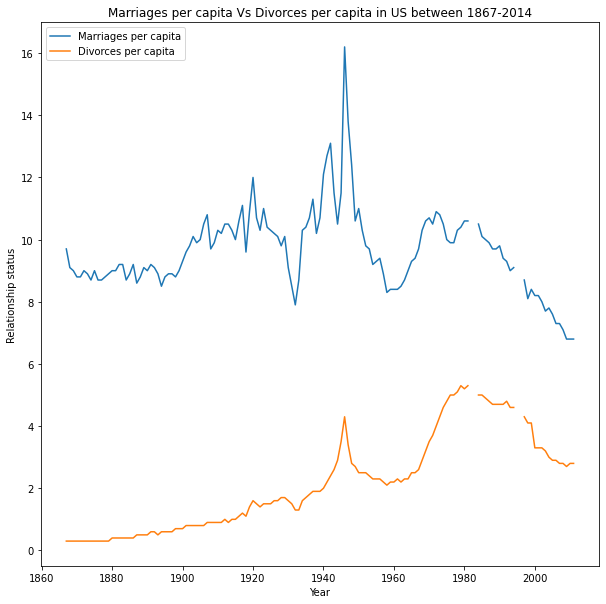

In [85]:
plt.plot(marriageData['Year'], marriageData['Marriages_per_1000'], label = "Marriages per capita")
plt.plot(marriageData['Year'], marriageData['Divorces_per_1000'], label = "Divorces per capita")

plt.title("Marriages per capita Vs Divorces per capita in US between 1867-2014")
plt.xlabel("Year")
plt.ylabel("Relationship status")
plt.legend(loc = "upper left")

plt.rcParams ["figure.figsize"] = (10,10)
plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

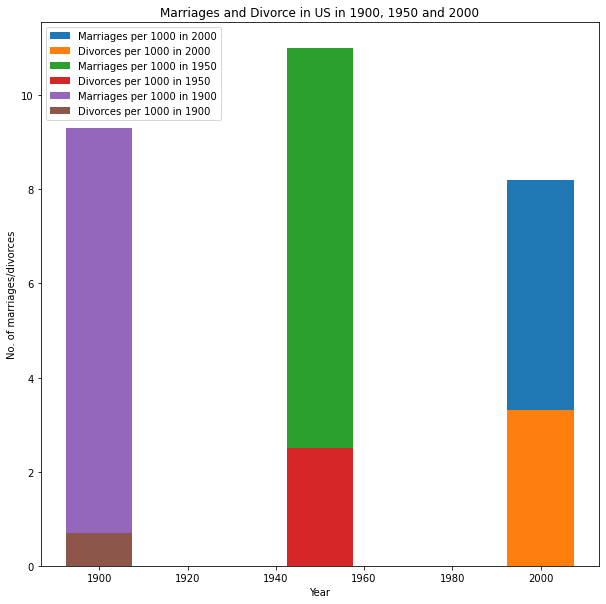

In [84]:
marriageIn2000 = marriageData[marriageData['Year'] == 2000]
marriageIn1950 = marriageData[marriageData['Year'] == 1950]
marriageIn1900 = marriageData[marriageData['Year'] == 1900]

plt.bar(marriageIn2000['Year'], marriageIn2000['Marriages_per_1000'], width = 15, label = 'Marriages per 1000 in 2000')
plt.bar(marriageIn2000['Year'], marriageIn2000['Divorces_per_1000'], width = 15, label = 'Divorces per 1000 in 2000')

plt.bar(marriageIn1950['Year'], marriageIn1950['Marriages_per_1000'], width = 15, label = 'Marriages per 1000 in 1950')
plt.bar(marriageIn1950['Year'], marriageIn1950['Divorces_per_1000'], width = 15, label = 'Divorces per 1000 in 1950')

plt.bar(marriageIn1900['Year'], marriageIn1900['Marriages_per_1000'], width = 15, label = 'Marriages per 1000 in 1900')
plt.bar(marriageIn1900['Year'], marriageIn1900['Divorces_per_1000'], width = 15, label = 'Divorces per 1000 in 1900')

plt.title("Marriages and Divorce in US in 1900, 1950 and 2000")
plt.legend(loc = "upper left")
plt.ylabel("No. of marriages/divorces")
plt.xlabel("Year")

plt.rcParams ["figure.figsize"] = (10,10)
plt.show()

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [64]:
actorsData = pd.read_csv('actor_kill_counts.csv')
actorsData.head(n=5)

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


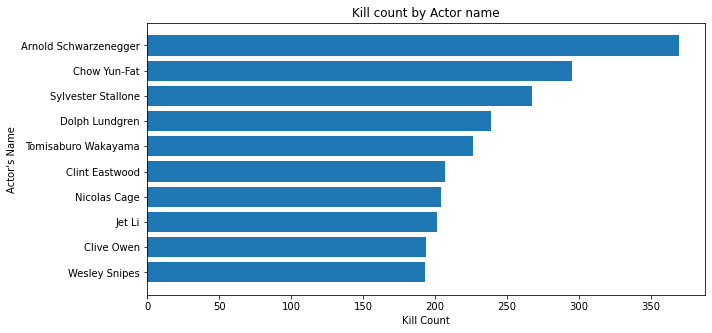

In [65]:
#horizontal bar chart
plt.barh(kill_count['Actor'], kill_count['Count'])

plt.ylabel("Actor's Name")
plt.xlabel("Kill Count")

plt.title("Kill count by Actor name")
plt.rcParams ["figure.figsize"] = (10,5)
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [66]:
romanEmperorData = pd.read_csv('roman-emperor-reigns.csv')
romanEmperorData.head(n=5)

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


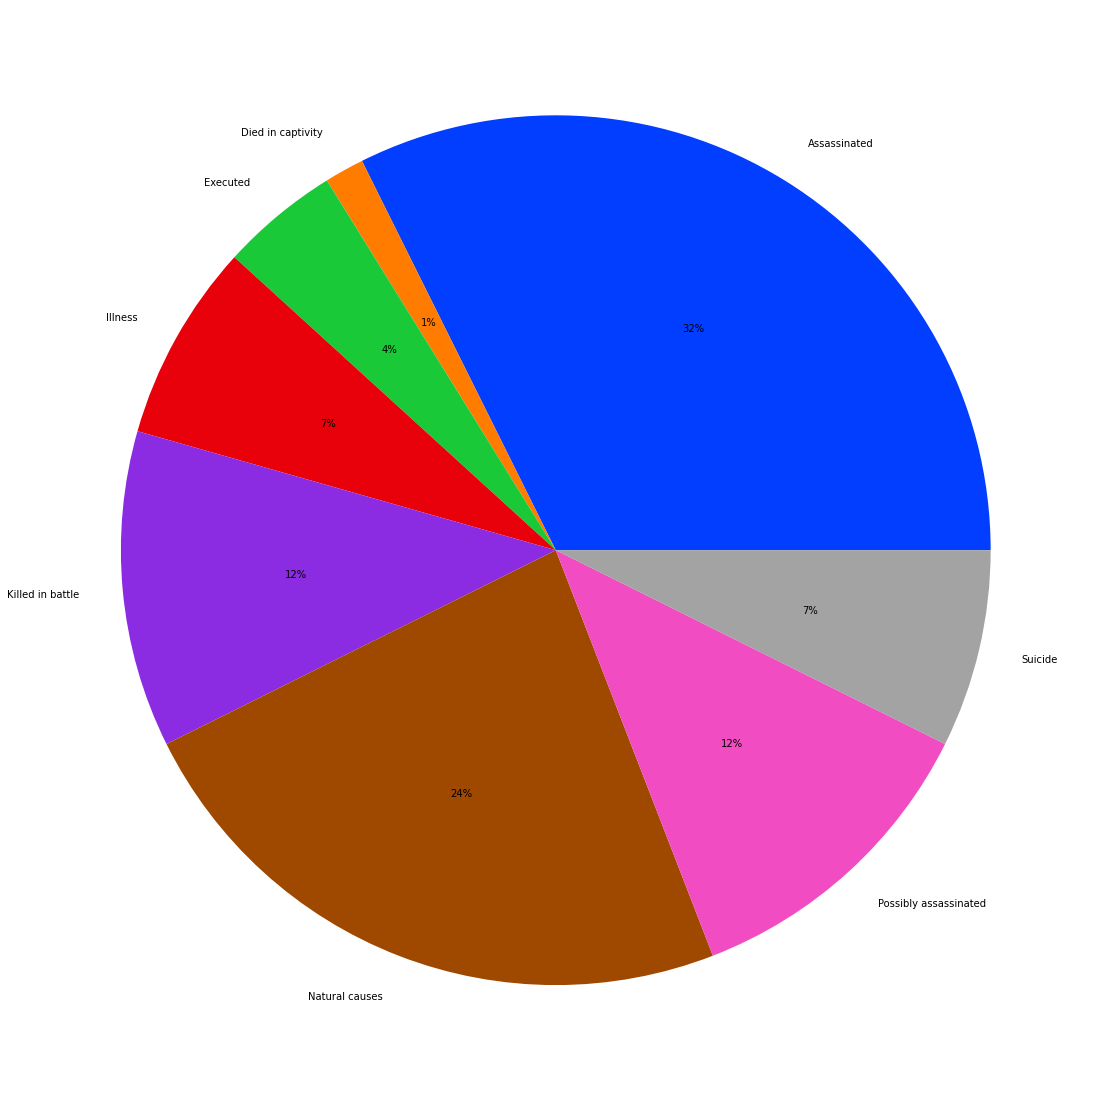

In [75]:
assasinatedRate = romanEmperorData.groupby(['Cause_of_Death'])['Cause_of_Death'].count().transform( lambda x: x/x.sum()*100)
deathRate = pd.DataFrame(assasinatedRate)

deathRate.rename(columns={'Cause_of_Death' : "Death_Rate" }, inplace = True)
deathRate['Cause_of_Death'] = deathRate.index

data = deathRate['Death_Rate']
keys = deathRate['Cause_of_Death']

palette_color = sns.color_palette('bright')

plt.pie(data, labels = keys, colors = palette_color, autopct='%.0f%%')
plt.show()
plt.rcParams ["figure.figsize"] = (10,10)

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

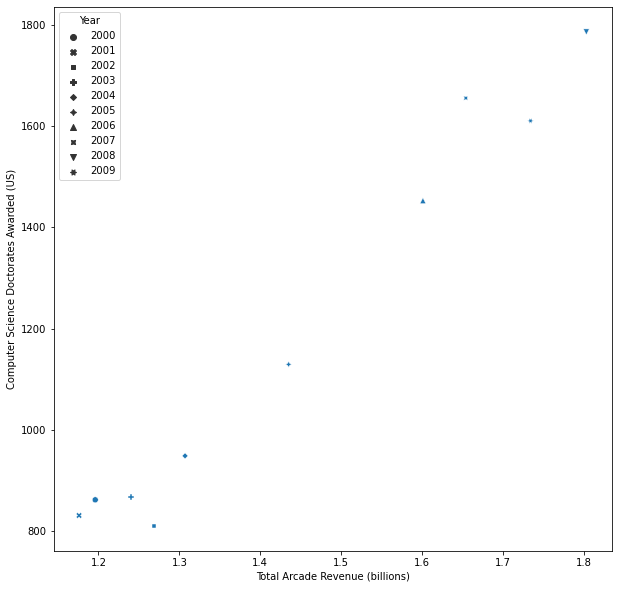

In [82]:
arcadeRevenueData = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

sns.scatterplot(x = arcadeRevenueData['Total Arcade Revenue (billions)'], 
                y = arcadeRevenueData['Computer Science Doctorates Awarded (US)'], 
                data = arcadeRevenueData, 
                style = 'Year')